Sales Summary:



,product,Total_Quantity,Revenue
0,Apple,50,125.0
1,Banana,63,75.6
2,Grapes,45,90.0
3,Mango,35,105.0
4,Orange,48,86.4
5,Pineapple,17,68.0
6,Watermelon,8,40.0


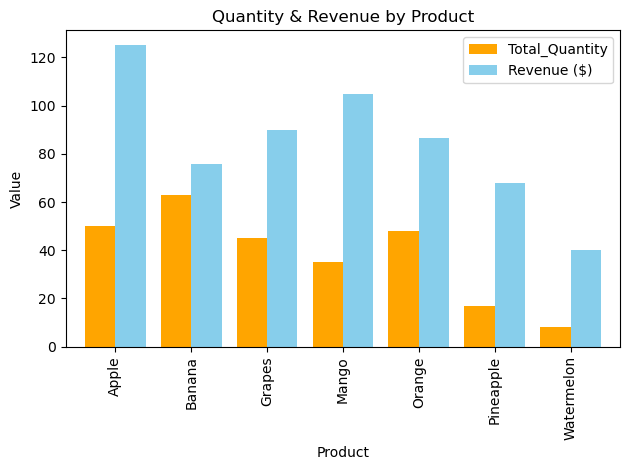

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# STEP 1: CREATE DATABASE & TABLE
# ===============================
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
sales_data = [
    ("Apple", 10, 2.5),
    ("Banana", 15, 1.2),
    ("Orange", 8, 1.8),
    ("Apple", 5, 2.5),
    ("Banana", 10, 1.2),
    ("Mango", 7, 3.0),
    ("Orange", 6, 1.8),
    ("Grapes", 12, 2.0),
    ("Mango", 5, 3.0),
    ("Apple", 8, 2.5),
    ("Pineapple", 4, 4.0),
    ("Apple", 12, 2.5),
    ("Banana", 18, 1.2),
    ("Orange", 10, 1.8),
    ("Watermelon", 3, 5.0),
    ("Grapes", 9, 2.0),
    ("Mango", 11, 3.0),
    ("Apple", 6, 2.5),
    ("Banana", 7, 1.2),
    ("Orange", 15, 1.8),
    ("Pineapple", 6, 4.0),
    ("Mango", 4, 3.0),
    ("Watermelon", 5, 5.0),
    ("Grapes", 14, 2.0),
    ("Apple", 9, 2.5),
    ("Banana", 13, 1.2),
    ("Orange", 9, 1.8),
    ("Mango", 8, 3.0),
    ("Pineapple", 7, 4.0),
    ("Grapes", 10, 2.0)
]

# Clear old data (optional)
cursor.execute("DELETE FROM sales")

# Insert data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()

# ===============================
# STEP 2: QUERY DATABASE
# ===============================
query ="""
SELECT 
    product,
    SUM(quantity) AS Total_Quantity,
    SUM(quantity * price) AS Revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# ===============================
# STEP 3: DISPLAY RESULTS
# ===============================
print("Sales Summary:\n")
display(df)

# ===============================
# STEP 4: PLOT SIDE-BY-SIDE BAR CHART
# ===============================
ax = df.plot(
    kind="bar",
    x="product",
    y=["Total_Quantity", "Revenue"],
    width=0.8,
    color=["orange", "skyblue"]
)

plt.title("Quantity & Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Value")
plt.legend(["Total_Quantity", "Revenue ($)"])
plt.tight_layout()

# Save and show chart
plt.savefig("sales_chart.png")
plt.show()